## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import xgboost as xgb

## **Datos**

In [88]:
df = pd.read_csv('./Data/Hourly_Energy_Consumption/PJME_hourly.csv')

In [89]:
df.set_index('Datetime', inplace=True)

In [90]:
df.index = pd.to_datetime(df.index)

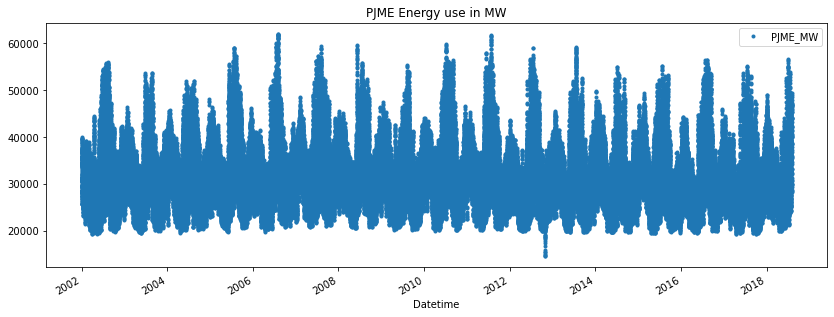

In [91]:
df.plot(
    figsize=(14, 5), 
    style='.',
    title='PJME Energy use in MW'
)

plt.show()

### **Train/Test Split**

In [92]:
train = df.loc[df.index < '01/01/2015']
test = df.loc[df.index >= '01/01/2015']

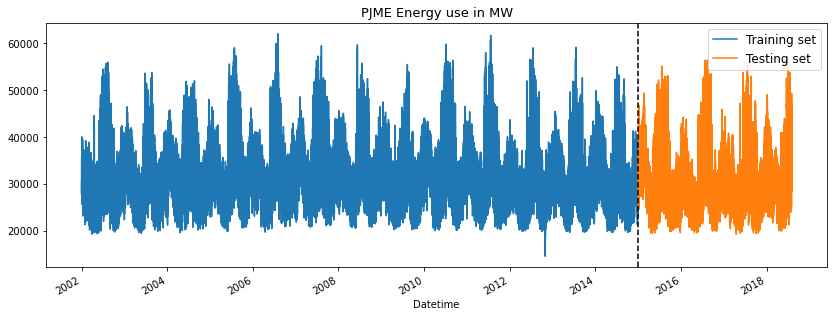

In [93]:
fig, ax = plt.subplots(figsize=(14,5))

plt.title('PJME Energy use in MW', fontsize=13)

train.plot(ax=ax, label='Training set')
test.plot(ax=ax, label='Testing set')

ax.axvline('01/01/2015', color='black', ls='--')

ax.legend(['Training set', 'Testing set'], loc='upper right', fontsize=12)

plt.show()

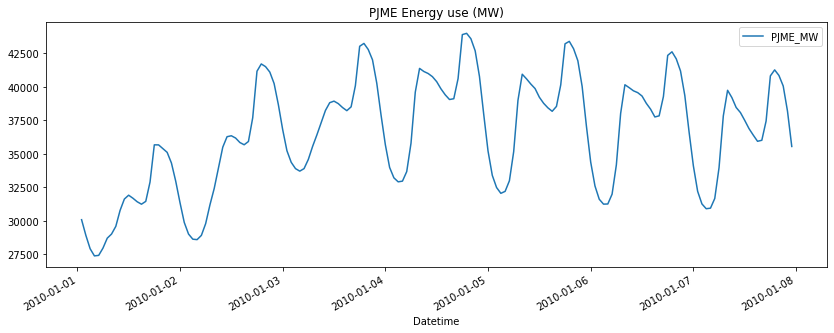

In [94]:
df.query('index > "01/01/2010" & index < "01/08/2010"').plot(
    figsize=(14, 5), 
    title='PJME Energy use (MW)'
)

plt.show()

### **Feature creation**

In [97]:
def create_features(df):
    '''
    Create time series features based on time series index.
    '''
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['dayofyear'] = df.index.day_of_year
    df['dayofweek'] = df.index.day_of_week
    df['hour'] = df.index.hour
    
    return df

In [99]:
df = create_features(df)

#### **Visualize our Feature**

In [141]:
def consumption_by(df, temporality):
    fig, ax = plt.subplots(figsize=(14, 5))

    plt.grid(visible=True, linewidth=0.1, color='white')
    fig.patch.set_facecolor('#21252b') 
    #ax.set_facecolor('#282c34') 
    
    plt.title(f'PJME Energy use in MW by {temporality}', fontsize=13, color='white')

    sns.boxplot(
        data = df,
        x = temporality,
        y = 'PJME_MW'
    )
    
    plt.xlabel(f'{temporality.capitalize()}', size=12, weight=400, color='white')
    plt.xticks(color='white', size=12)

    plt.ylabel('PJME (MW)', size=12, weight=400, color='white')
    plt.yticks(color='white', size=12)

    plt.show()

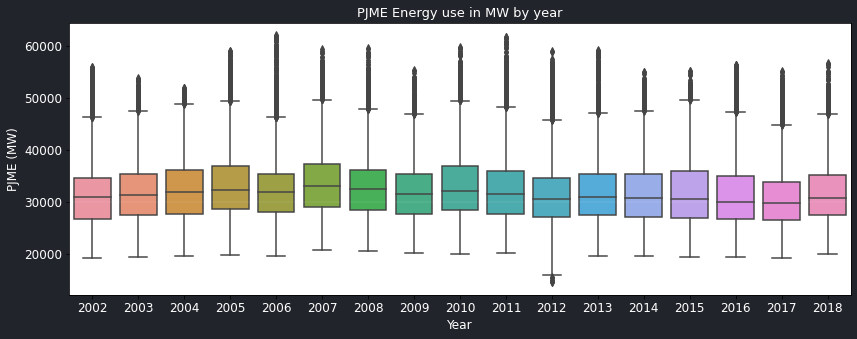

In [142]:
consumption_by(df, 'year')

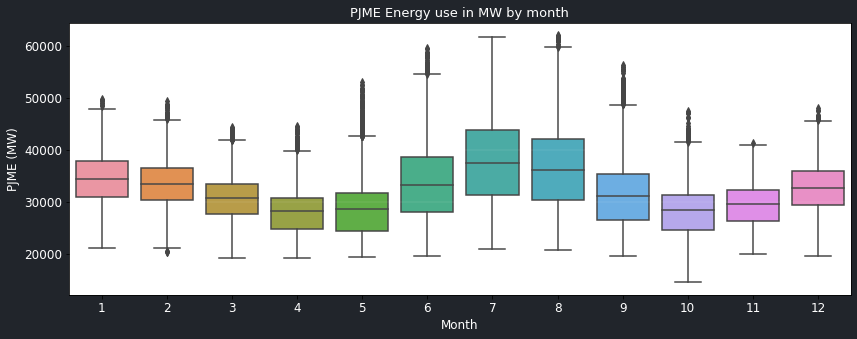

In [143]:
consumption_by(df, 'month')

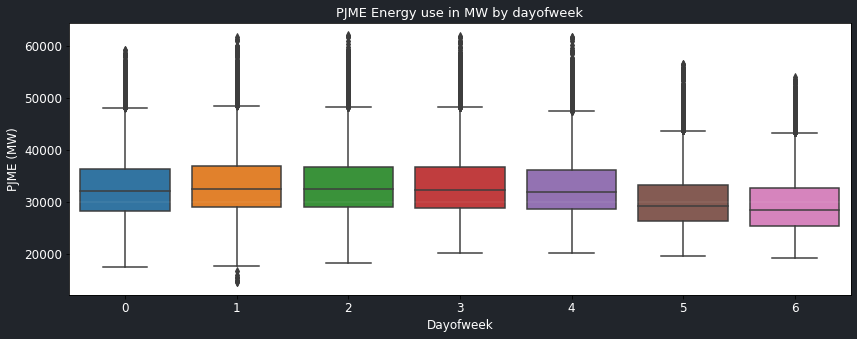

In [144]:
consumption_by(df, 'dayofweek')

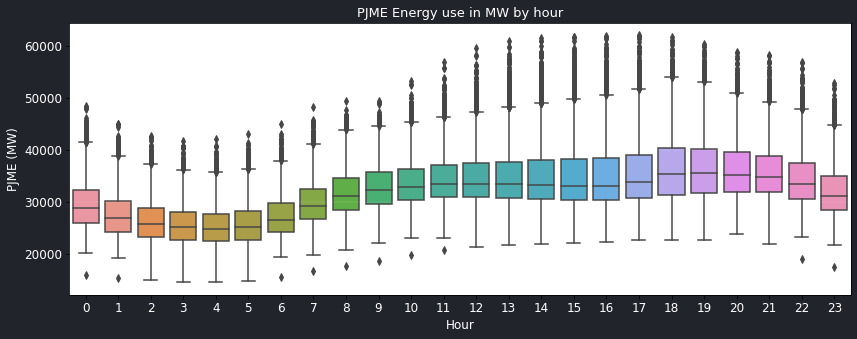

In [145]:
consumption_by(df, 'hour')